# Classification

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/insop/ML_crash_course/blob/main/3_classification.ipynb)

## Overview
- recap from previous [notebook](https://github.com/insop/ML_crash_course/blob/main/2_linear_regression.ipynb)
- classification task

***

## Recap from [previous notebook](https://github.com/insop/ML_crash_course/blob/main/2_linear_regression.ipynb)



- how to form linear regression
- how to measure goodness of the hypothesis? *loss function*
- how to find the best parameters (weights)? *optimization*
- gradient descent method, $w \leftarrow w - \eta$ $\nabla$ Train_loss($W$) 

## Classfiction task

- predicts the class of output
- binary classifier, output classes are 0 or 1
- multi class classifier

We will use binary classifier first, classifier takes input and produce scalar output.

$x$ (input) $\rightarrow$ $f$ (classifier)

Based on the value, we can decide if the predicted output is 0 or 1.

Multi class classification can be extended by using binary classfifcaiton.

We will show an example of binary classifier using logistic regression model.

## Classificaiton example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.special import logit

%matplotlib inline

### Load dataset, which include 2 features (2 exam scores), and admittance result.


In [2]:
# Admission data: 
# - exam 1 score (x1) 
# - exam 2 score (x2)
# - admitted (y)

data = np.loadtxt('datasets/ex2data1.txt', delimiter=',')

In [3]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

### Good practice is to split train and test data. Train dataset is used to train model. Test dataset is used evaluate the final mode.

In [4]:
# train test split

# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# LogisticRegression estimator expect an y row vector
y_train = y_train.squeeze()
y_test = y_test.squeeze()

### We will use logictic regression model.

In [6]:
# define logistic regression

# Parameter C is the inverse regularization strength (high values = low regularization).
clf = LogisticRegression(C=1e9, solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [7]:
# learned parameters

theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

### The following code cells for plot the results.

In [8]:
# Computes x2 at y = logit(0.5) from x1 and model parameters
# based on equation y = sigmoid(theta0 + theta1*x1 + theta2*x2)
# logit(p) = log(p/(1-p)).
# (used for computing the linear decision boundary)
def x2(x1):
    return (logit(0.5) - theta0 - theta1*x1) / theta2

In [9]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [10]:
# x1 and x2 data of linear decision boundary
x1_plot = np.array([x1_min, x1_max])
x2_plot = x2(x1_plot)

### Plot with training data

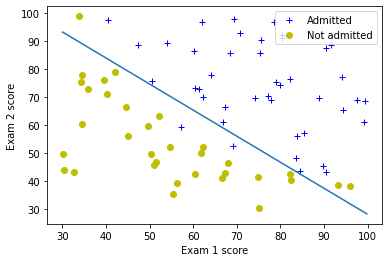

In [11]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y_train == 1
y_neg = y_train == 0

# Plot examples and decision boundary
ax.plot(X_train[y_pos,0], X_train[y_pos,1], 'b+', label='Admitted')
ax.plot(X_train[y_neg,0], X_train[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

The accuracy of the model with training dataset.

In [12]:
# Return the mean accuracy on the given test data and labels.

clf.score(X_train, y_train)

0.9333333333333333

In [13]:
y_train_pred=clf.predict(X_train)

### Plot for test data

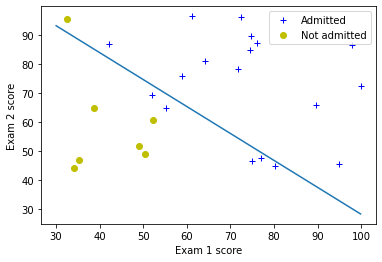

In [14]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y_test == 1
y_neg = y_test == 0

# Plot examples and decision boundary
ax.plot(X_test[y_pos,0], X_test[y_pos,1], 'b+', label='Admitted')
ax.plot(X_test[y_neg,0], X_test[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

The accuracy of the mode with test dataset (held out dataset), which is used for measuring final model performance.

In [15]:
# Return the mean accuracy on the given test data and labels.

clf.score(X_test, y_test)

0.76

In [16]:
y_test_pred=clf.predict(X_test)

### Precision

Precision = $\frac{TP}{TP+FP}$, among predicted to be true (TP+FP), how many of them are true (TP)

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_test_pred)

0.9285714285714286

### Recall

Recall = $\frac{TP}{TP+FN}$, among real true (TP+FN), how many of them are true

In [25]:
recall_score(y_test, y_test_pred)

0.7222222222222222

### F1 score

F1 score = $\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$

In [28]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred)

0.8125000000000001

### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 6,  1],
       [ 5, 13]])

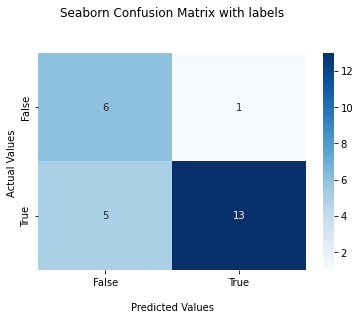

In [30]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Summary
- review classification
- classification example
***

## Credits

This notebook uses the contents from the followring materials:

1. Chapter 2 from Book [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
1. [Example code from https://github.com/krasserm](https://github.com/krasserm/machine-learning-notebooks/blob/1a0b8b65a0d2013af0e0b304e792199be2e54973/ml-ex2.ipynb)